In [1]:
#Adjust Frame
from tkinter import Toplevel, Label, Scale, Button, HORIZONTAL, RIGHT
import cv2
import numpy as np


s = 100
MAX_VALUE = 100
class AdjustFrame(Toplevel):


    def __init__(self, master=None):
        Toplevel.__init__(self, master=master)

        self.brightness_value = 255
        self.previous_brightness_value = 255
        self.i=0
        self.contrast_value = 127
        self.previous_contrast_value = 127

        self.original_image = self.master.processed_image
        self.copy=self.original_image
        self.copy1=cv2.cvtColor(self.original_image, cv2.COLOR_BGR2HLS)
        self.processing_image = self.master.processed_image
        self.contrast_label = Label(self, text="Contrast")
        self.contrast_scale = Scale(self, from_=0, to_=255, length=250, resolution=1,
                                       orient=HORIZONTAL)
        self.brightness_label = Label(self, text="Brightness")
        self.brightness_scale = Scale(self, from_=0, to_=510, length=250, resolution=1,
                                      orient=HORIZONTAL)
        # self.saturation_label = Label(self, text="Saturation")
        # self.saturation_scale = Scale(self, from_=0, to_=2, length=250, resolution=0.1,
        #                               orient=HORIZONTAL)
        self.clarity_label = Label(self, text="Blur")
        self.clarity_scale = Scale(self, from_=0, to_=2, length=250, resolution=0.1,
                                    orient=HORIZONTAL)
        self.warmth_label = Label(self, text="Warmth")
        self.warmth_scale = Scale(self, from_=0, to_=1, length=250, resolution=0.05,
                                   orient=HORIZONTAL)
        self.cool_label = Label(self, text="Cool")
        self.cool_scale = Scale(self, from_=0, to_=1, length=250, resolution=0.05,
                                  orient=HORIZONTAL)



        self.r_label = Label(self, text="R")
        self.r_scale = Scale(self, from_=-100, to_=100, length=250, resolution=1,
                             orient=HORIZONTAL)
        self.g_label = Label(self, text="G")
        self.g_scale = Scale(self, from_=-100, to_=100, length=250, resolution=1,
                             orient=HORIZONTAL)
        self.b_label = Label(self, text="B")
        self.b_scale = Scale(self, from_=-100, to_=100, length=250, resolution=1,
                             orient=HORIZONTAL)
        self.apply_button = Button(self, text="Apply")
        self.preview_button = Button(self, text="Preview")
        self.cancel_button = Button(self, text="Cancel")

        self.brightness_scale.set(255)
        self.contrast_scale.set(127)
        self.warmth_scale.set(0)
        self.cool_scale.set(0)
        # self.saturation_scale.set(1)
        self.clarity_scale.set(0)

        self.apply_button.bind("<ButtonRelease>", self.apply_button_released)
        self.preview_button.bind("<ButtonRelease>", self.show_button_release)
        self.cancel_button.bind("<ButtonRelease>", self.cancel_button_released)

        self.brightness_label.pack()
        self.brightness_scale.pack()
        self.warmth_label.pack()
        self.warmth_scale.pack()
        self.cool_label.pack()
        self.cool_scale.pack()
        self.clarity_label.pack()
        self.clarity_scale.pack()
        self.contrast_label.pack()
        self.contrast_scale.pack()
        self.r_label.pack()
        self.r_scale.pack()
        self.g_label.pack()
        self.g_scale.pack()
        self.b_label.pack()
        self.b_scale.pack()
        self.cancel_button.pack(side=RIGHT)
        self.preview_button.pack(side=RIGHT)
        self.apply_button.pack()

    def apply_button_released(self, event):
        self.show_button_release(self)
        self.master.processed_image = self.processing_image
        self.close()

    def gamma_function(self,channel, gamma):
        invGamma = 1 / gamma
        table = np.array([((i / 255.0) ** invGamma) * 255
                          for i in np.arange(0, 256)]).astype("uint8")  # creating lookup table
        channel = cv2.LUT(channel, table)
        return channel

    def show_button_release(self, event):
        temp = self.copy.copy
        self.show_image(self.copy)
        self.original_image = self.copy
        b, g, r = cv2.split(self.processing_image)

        for b_value in b:
            cv2.add(b_value, self.b_scale.get(), b_value)
        for g_value in g:
            cv2.add(g_value, self.g_scale.get(), g_value)
        for r_value in r:
            cv2.add(r_value, self.r_scale.get(), r_value)


        self.rgb = cv2.merge((b, g, r))



        brightness = int((self.brightness_scale.get() - 0) * (255 - (-255)) / (510 - 0) + (-255))

        contrast = int((self.contrast_scale.get() - 0) * (127 - (-127)) / (254 - 0) + (-127))

        if brightness != 0:

            if brightness > 0:

                shadow = brightness

                max = 255

            else:

                shadow = 0
                max = 255 + brightness

            al_pha = (max - shadow) / 255
            ga_mma = shadow

            # The function addWeighted calculates
            # the weighted sum of two arrays
            cal = cv2.addWeighted(self.rgb, al_pha,
                                  self.rgb, 0, ga_mma)


        else:
            cal = self.rgb

        if contrast != 0:
            Alpha = float(131 * (contrast + 127)) / (127 * (131 - contrast))
            Gamma = 127 * (1 - Alpha)

            # The function addWeighted calculates
            # the weighted sum of two arrays
            cal = cv2.addWeighted(cal, Alpha,
                                  cal, 0, Gamma)


        clar = self.clarity_scale.get()
        print(clar)
        if clar!=0:
            clar = (int)(clar * 10)
            img = cv2.blur(cal, (clar, clar))
            self.processing_image = img
            # cv2.imshow("test", img)
            # cv2.waitKey(0)
        else:
            self.processing_image = cal

        warmth=self.warmth_scale.get()
        warmth/=2
        img = self.processing_image
        img[:, :, 0] = self.gamma_function(img[:, :, 0], 1-warmth)  # down scaling blue channel
        img[:, :, 2] = self.gamma_function(img[:, :, 2], 1+warmth)  # up scaling red channel
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hsv[:, :, 1] = self.gamma_function(hsv[:, :, 1], 1+warmth-0.01)  # up scaling saturation channel
        img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        self.processing_image = img

        cool = self.cool_scale.get()
        cool /= 2
        img1 = self.processing_image
        img1[:, :, 0] = self.gamma_function(img1[:, :, 0], 1 + cool)  # down scaling blue channel
        img1[:, :, 2] = self.gamma_function(img1[:, :, 2], 1 - cool)  # up scaling red channel
        hsv1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
        hsv1[:, :, 1] = self.gamma_function(hsv1[:, :, 1], 1 - cool+0.01)  # up scaling saturation channel
        img1 = cv2.cvtColor(hsv1, cv2.COLOR_HSV2BGR)
        self.processing_image = img1

        self.original_image=temp
        # self.processing_image=cv2.addWeighted(self.processing_image,0.3,self.rgb,0.7,0.0)
        # self.processing_image = cv2.addWeighted(self.processing_image, 0.3, img, 0.7, 0.0)
        self.show_image(self.processing_image)
        # self.destroy()

    def cancel_button_released(self, event):
        self.close()

    def show_image(self, img=None):
        self.master.image_viewer.show_image(img=img)

    def close(self):
        self.show_image()
        self.destroy()

In [2]:
#Filter Frame 
from tkinter import Toplevel, Button, RIGHT
import numpy as np
import cv2


class FilterFrame(Toplevel):

    def __init__(self, master=None):
        Toplevel.__init__(self, master=master)

        self.original_image = self.master.processed_image
        self.filtered_image = None

        self.negative_button = Button(master=self, text="Negative",height=1, width=15)
        self.black_white_button = Button(master=self, text="Black White",height=1, width=15)
        self.sepia_button = Button(master=self, text="Sepia",height=1, width=15)
        self.emboss_button = Button(master=self, text="Emboss",height=1, width=15)
        self.gaussian_blur_button = Button(master=self, text="Gaussian Blur",height=1, width=15)
        self.median_blur_button = Button(master=self, text="Median Blur",height=1, width=15)
        self.details_button = Button(master=self, text="Details",height=1, width=15)
        self.summer_button = Button(master=self, text="Summer",height=1, width=15)
        self.winter_button = Button(master=self, text="Winter",height=1, width=15)
        self.daylight_button = Button(master=self, text="DayLight",height=1, width=15)
        self.grainy_button = Button(master=self, text="Grainy",height=1, width=15)
        self.highcontrast_button=Button(master=self,text="High Contrast",height=1, width=15)
        self.smoothen_button = Button(master=self, text="Smoothen",height=1, width=15)
        self.vignette_button = Button(master=self, text="Vignette",height=1, width=15)
        self.bonus_button = Button(master=self, text="Bonus",height=1, width=15)
        self.distorted_button = Button(master=self, text="Distorted",height=1, width=15)
        self.cancel_button = Button(master=self, text="Cancel")
        self.apply_button = Button(master=self, text="Apply")
        self.details_button=Button(master=self,text="Details",height=1, width=15)

        self.negative_button.bind("<ButtonRelease>", self.negative_button_released)
        self.black_white_button.bind("<ButtonRelease>", self.black_white_released)
        self.sepia_button.bind("<ButtonRelease>", self.sepia_button_released)
        self.emboss_button.bind("<ButtonRelease>", self.emboss_button_released)
        self.gaussian_blur_button.bind("<ButtonRelease>", self.gaussian_blur_button_released)
        self.median_blur_button.bind("<ButtonRelease>", self.median_blur_button_released)
        self.details_button.bind("<ButtonRelease>", self.details_button_released)
        self.summer_button.bind("<ButtonRelease>", self.summer_button_released)
        self.winter_button.bind("<ButtonRelease>", self.winter_button_released)
        self.daylight_button.bind("<ButtonRelease>", self.daylight_button_released)
        self.grainy_button.bind("<ButtonRelease>", self.grainy_button_released)
        self.smoothen_button.bind("<ButtonRelease>", self.smoothen_button_released)
        self.highcontrast_button.bind("<ButtonRelease>", self.highcontrast_button_released)
        self.distorted_button.bind("<ButtonRelease>", self.distorted_button_released)
        self.vignette_button.bind("<ButtonRelease>", self.vignette_button_released)
        self.bonus_button.bind("<ButtonRelease>", self.bonus_button_released)
        self.apply_button.bind("<ButtonRelease>", self.apply_button_released)
        self.cancel_button.bind("<ButtonRelease>", self.cancel_button_released)

        self.negative_button.pack()
        self.black_white_button.pack()
        self.sepia_button.pack()
        self.emboss_button.pack()
        self.gaussian_blur_button.pack()
        self.median_blur_button.pack()
        self.details_button.pack()
        self.summer_button.pack()
        self.winter_button.pack()
        self.distorted_button.pack()
        self.daylight_button.pack()
        self.grainy_button.pack()
        self.smoothen_button.pack()
        self.highcontrast_button.pack()
        self.vignette_button.pack()
        self.bonus_button.pack()
        self.cancel_button.pack(side=RIGHT)
        self.apply_button.pack()

    def details_button_released(self, event):
        self.details()
        self.show_image()
    def bonus_button_released(self, event):
        self.bonus()
        self.show_image()
    def distorted_button_released(self, event):
        self.distorted()
        self.show_image()
    def highcontrast_button_released(self, event):
        self.highcontrast()
        self.show_image()
    def summer_button_released(self, event):
        self.summer()
        self.show_image()
    def winter_button_released(self, event):
        self.winter()
        self.show_image()
    def daylight_button_released(self, event):
        self.daylight()
        self.show_image()
    def grainy_button_released(self, event):
        self.grainy()
        self.show_image()
    def smoothen_button_released(self, event):
        self.smoothen()
        self.show_image()
    def vignette_button_released(self, event):
        self.vignette()
        self.show_image()

    # dst = cv2.stylization(self.original_image, sigma_s=60, sigma_r=0.07)
    # dst_gray, dst_color = cv2.pencilSketch(self.original_image, sigma_s=60, sigma_r=0.07, shade_factor=0.05)

    def details(self):
        # sigma_s controls how much the image is smoothed - the larger its value,
        # the more smoothed the image gets, but it's also slower to compute.
        # sigma_r is important if you want to preserve edges while smoothing the image.
        # Small sigma_r results in only very similar colors to be averaged (i.e. smoothed), while colors that differ much will stay intact.
        kernel_sharpening = np.array([[-1, -1, -1],
                                      [-1, 9, -1],
                                      [-1, -1, -1]])
        dst2 = cv2.filter2D(self.original_image, -1, kernel_sharpening)
        self.filtered_image=dst2

    def gamma_function(self,channel, gamma):
        invGamma = 1 / gamma
        table = np.array([((i / 255.0) ** invGamma) * 255
                          for i in np.arange(0, 256)]).astype("uint8")  # creating lookup table
        channel = cv2.LUT(channel, table)
        return channel

    def summer(self):
        img = self.original_image
        img[:, :, 0] = self.gamma_function(img[:, :, 0], 0.75)  # down scaling blue channel
        img[:, :, 2] = self.gamma_function(img[:, :, 2], 1.25)  # up scaling red channel
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hsv[:, :, 1] = self.gamma_function(hsv[:, :, 1], 1.2)  # up scaling saturation channel
        img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        self.filtered_image=img

    def winter(self):
        img = self.original_image
        img[:, :, 0] = self.gamma_function(img[:, :, 0], 1.25)  # down scaling blue channel
        img[:, :, 2] = self.gamma_function(img[:, :, 2], 0.75)  # up scaling red channel
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hsv[:, :, 1] = self.gamma_function(hsv[:, :, 1], 0.8)  # up scaling saturation channel
        img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        self.filtered_image=img

    def vignette(self):
        rows, cols = self.original_image.shape[:2]

        # generating vignette mask using Gaussian
        # resultant_kernels
        X_resultant_kernel = cv2.getGaussianKernel(cols, 200)
        Y_resultant_kernel = cv2.getGaussianKernel(rows, 200)

        # generating resultant_kernel matrix
        resultant_kernel = Y_resultant_kernel * X_resultant_kernel.T

        # creating mask and normalising by using np.linalg
        # function
        mask = 255 * resultant_kernel / np.linalg.norm(resultant_kernel)
        output = np.copy(self.original_image)

        # applying the mask to each channel in the input image
        for i in range(3):
            output[:, :, i] = output[:, :, i] * mask
        self.filtered_image=output

    def smoothen(self):
        dst2 = cv2.edgePreservingFilter(self.original_image, flags=1, sigma_s=60, sigma_r=0.4)
        self.filtered_image = dst2

    def bonus(self):
        dst = cv2.stylization(self.original_image, sigma_s=60, sigma_r=0.07)
        self.filtered_image = dst

    def distorted(self):
        dst_gray, dst_color = cv2.pencilSketch(self.original_image, sigma_s=60, sigma_r=0.07, shade_factor=0.05)
        self.filtered_image = dst_color

    def daylight(self):
        img = self.original_image
        image_HLS = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)  # Conversion to HLS
        image_HLS = np.array(image_HLS, dtype=np.float64)
        daylight = 1.15
        image_HLS[:, :, 1] = image_HLS[:, :, 1] * daylight  # scale pixel values up for channel 1(Lightness)
        image_HLS[:, :, 1][image_HLS[:, :, 1] > 255] = 255  # Sets all values above 255 to 255
        image_HLS = np.array(image_HLS, dtype=np.uint8)
        image_RGB = cv2.cvtColor(image_HLS, cv2.COLOR_HLS2BGR)
        self.filtered_image=image_RGB

    def grainy(self):
        img = self.original_image
        height, width = img.shape[:2]
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        thresh = 0.8  # creating threshold. This means noise will be added to 80% pixels
        for i in range(height):
            for j in range(width):
                if np.random.rand() <= thresh:
                    if np.random.randint(2) == 0:
                        gray[i, j] = min(gray[i, j] + np.random.randint(0, 64),
                                         255)  # adding random value between 0 to 64. Anything above 255 is set to 255.
                    else:
                        gray[i, j] = max(gray[i, j] - np.random.randint(0, 64),
                                         0)  # subtracting random values between 0 to 64. Anything below 0 is set to 0.
        self.filtered_image=gray

    def highcontrast(self):
        img = self.original_image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        xp = [0, 64, 112, 128, 144, 192, 255]  # setting reference values
        fp = [0, 16, 64, 128, 192, 240, 255]  # setting values to be taken for reference values
        x = np.arange(256)
        table = np.interp(x, xp, fp).astype('uint8')  # creating lookup table
        img = cv2.LUT(gray, table)  # changing values based on lookup table
        self.filtered_image = img

    def negative_button_released(self, event):
        self.negative()
        self.show_image()

    def black_white_released(self, event):
        self.black_white()
        self.show_image()

    def sepia_button_released(self, event):
        self.sepia()
        self.show_image()

    def emboss_button_released(self, event):
        self.emboss()
        self.show_image()

    def gaussian_blur_button_released(self, event):
        self.gaussian_blur()
        self.show_image()

    def median_blur_button_released(self, event):
        self.gaussian_blur()
        self.show_image()

    def apply_button_released(self, event):
        self.master.processed_image = self.filtered_image
        self.show_image()
        self.close()

    def cancel_button_released(self, event):
        self.master.image_viewer.show_image()
        self.close()

    def show_image(self):
        self.master.image_viewer.show_image(img=self.filtered_image)

    def negative(self):
        self.filtered_image = cv2.bitwise_not(self.original_image)

    def black_white(self):
        self.filtered_image = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2GRAY)
        self.filtered_image = cv2.cvtColor(self.filtered_image, cv2.COLOR_GRAY2BGR)

    def sepia(self):
        kernel = np.array([[0.272, 0.534, 0.131],
                           [0.349, 0.686, 0.168],
                           [0.393, 0.769, 0.189]])

        self.filtered_image = cv2.filter2D(self.original_image, -1, kernel)

    def emboss(self):
        kernel = np.array([[0, -1, -1],
                           [1, 0, -1],
                           [1, 1, 0]])

        self.filtered_image = cv2.filter2D(self.original_image, -1, kernel)

    def gaussian_blur(self):
        self.filtered_image = cv2.GaussianBlur(self.original_image, (41, 41), 0)

    def median_blur(self):
        self.filtered_image = cv2.medianBlur(self.original_image, 41)

    def close(self):
        self.destroy()

In [3]:
#Edit bar 
from tkinter import Frame, Button, LEFT
from tkinter import filedialog
#from filterFrame import FilterFrame
#from adjustFrame import AdjustFrame
import cv2


class EditBar(Frame):

    def __init__(self, master=None):
        Frame.__init__(self, master=master)

        self.new_button = Button(self, text="New",fg="blue")
        self.save_button = Button(self, text="Save",fg="blue")
        self.save_as_button = Button(self, text="Save As",fg="blue")
        self.draw_button = Button(self, text="Draw",fg="blue")
        self.crop_button = Button(self, text="Crop",fg="blue")
        self.mirror_button = Button(self, text="Mirror",fg="blue")
        self.rotate_button = Button(self, text="Rotate",fg="blue")
        self.filter_button = Button(self, text="Filter",fg="blue")
        self.adjust_button = Button(self, text="Adjust",fg="blue")
        self.cartoon_button = Button(self, text="Cartoon",fg="blue")
        self.bg_button = Button(self, text="Background change",fg="blue")
        self.clear_button = Button(self, text="Clear",fg="blue")

        self.new_button.bind("<ButtonRelease>", self.new_button_released)
        self.save_button.bind("<ButtonRelease>", self.save_button_released)
        self.save_as_button.bind("<ButtonRelease>", self.save_as_button_released)
        self.draw_button.bind("<ButtonRelease>", self.draw_button_released)
        self.crop_button.bind("<ButtonRelease>", self.crop_button_released)
        self.mirror_button.bind("<ButtonRelease>", self.mirror_button_released)
        self.rotate_button.bind("<ButtonRelease>", self.rotate_button_released)
        self.filter_button.bind("<ButtonRelease>", self.filter_button_released)
        self.adjust_button.bind("<ButtonRelease>", self.adjust_button_released)
        self.cartoon_button.bind("<ButtonRelease>", self.cartoon_button_released)
        self.bg_button.bind("<ButtonRelease>", self.bg_button_released)
        self.clear_button.bind("<ButtonRelease>", self.clear_button_released)


        self.new_button.pack(side=LEFT)
        self.save_button.pack(side=LEFT)
        self.save_as_button.pack(side=LEFT)
        self.draw_button.pack(side=LEFT)
        self.crop_button.pack(side=LEFT)
        self.filter_button.pack(side=LEFT)
        self.adjust_button.pack(side=LEFT)
        self.mirror_button.pack(side=LEFT)
        self.rotate_button.pack(side=LEFT)
        self.cartoon_button.pack(side=LEFT)
        self.bg_button.pack(side=LEFT)
        self.clear_button.pack()

    def rotate_button_released(self, event):
        if self.winfo_containing(event.x_root, event.y_root) == self.rotate_button:
            if self.master.is_image_selected:
                if self.master.is_draw_state:
                    self.master.image_viewer.deactivate_draw()
                if self.master.is_crop_state:
                    self.master.image_viewer.deactivate_crop()

                self.master.processed_image = cv2.rotate(self.master.original_image, cv2.ROTATE_90_CLOCKWISE)
                self.master.image_viewer.show_image()
                self.master.original_image = self.master.processed_image

    def mirror_button_released(self, event):
        if self.winfo_containing(event.x_root, event.y_root) == self.mirror_button:
            if self.master.is_image_selected:
                if self.master.is_draw_state:
                    self.master.image_viewer.deactivate_draw()
                if self.master.is_crop_state:
                    self.master.image_viewer.deactivate_crop()

                self.master.processed_image = cv2.flip(self.master.processed_image, 1)
                self.master.image_viewer.show_image()
                self.master.original_image = self.master.processed_image

    def new_button_released(self, event):
        if self.winfo_containing(event.x_root, event.y_root) == self.new_button:
            if self.master.is_draw_state:
                self.master.image_viewer.deactivate_draw()
            if self.master.is_crop_state:
                self.master.image_viewer.deactivate_crop()

            filename = filedialog.askopenfilename()
            image = cv2.imread(filename)

            if image is not None:
                self.master.filename = filename
                self.master.original_image = image.copy()
                self.master.processed_image = image.copy()
                self.master.image_viewer.show_image()
                self.master.is_image_selected = True

    def save_button_released(self, event):
        if self.winfo_containing(event.x_root, event.y_root) == self.save_button:
            if self.master.is_image_selected:
                if self.master.is_crop_state:
                    self.master.image_viewer.deactivate_crop()
                if self.master.is_draw_state:
                    self.master.image_viewer.deactivate_draw()

                save_image = self.master.processed_image
                image_filename = self.master.filename
                cv2.imwrite(image_filename, save_image)

    def save_as_button_released(self, event):
        if self.winfo_containing(event.x_root, event.y_root) == self.save_as_button:
            if self.master.is_image_selected:
                if self.master.is_draw_state:
                    self.master.image_viewer.deactivate_draw()
                if self.master.is_crop_state:
                    self.master.image_viewer.deactivate_crop()

                original_file_type = self.master.filename.split('.')[-1]
                filename = filedialog.asksaveasfilename()
                filename = filename + "." + original_file_type

                save_image = self.master.processed_image
                cv2.imwrite(filename, save_image)

                self.master.filename = filename

    def draw_button_released(self, event):
        if self.winfo_containing(event.x_root, event.y_root) == self.draw_button:
            if self.master.is_image_selected:
                if self.master.is_crop_state:
                    self.master.image_viewer.deactivate_crop()
                if self.master.is_draw_state:
                    self.master.image_viewer.deactivate_draw()
                else:
                    self.master.image_viewer.activate_draw()

    def crop_button_released(self, event):
        if self.winfo_containing(event.x_root, event.y_root) == self.crop_button:
            if self.master.is_image_selected:
                if self.master.is_draw_state:
                    self.master.image_viewer.deactivate_draw()
                if self.master.is_crop_state:
                    self.master.image_viewer.deactivate_crop()
                else:
                    self.master.image_viewer.activate_crop()

    def filter_button_released(self, event):
        if self.winfo_containing(event.x_root, event.y_root) == self.filter_button:
            if self.master.is_image_selected:
                if self.master.is_draw_state:
                    self.master.image_viewer.deactivate_draw()
                if self.master.is_crop_state:
                    self.master.image_viewer.deactivate_crop()

                self.master.filter_frame = FilterFrame(master=self.master)
                self.master.filter_frame.grab_set()

    def adjust_button_released(self, event):
        self.master.processed_image = self.master.original_image.copy()
        self.master.image_viewer.show_image()
        if self.winfo_containing(event.x_root, event.y_root) == self.adjust_button:
            if self.master.is_image_selected:
                if self.master.is_draw_state:
                    self.master.image_viewer.deactivate_draw()
                if self.master.is_crop_state:
                    self.master.image_viewer.deactivate_crop()

                self.master.adjust_frame = AdjustFrame(master=self.master)
                self.master.adjust_frame.grab_set()
                
    def bg_button_released(self, event):
        self.master.processed_image = self.master.original_image.copy()
        self.master.image_viewer.show_image()
    
    def cartoon_button_released(self,event):
        if self.winfo_containing(event.x_root, event.y_root) == self.cartoon_button:
            
            self.master.processed_image = self.master.original_image.copy()
            img=self.master.processed_image
            def edge_mask(img, line_size, blur_value):
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                gray_blur = cv2.medianBlur(gray, blur_value)
                edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
                return edges
            line_size = 7
            blur_value = 7
            edges = edge_mask(img, line_size, blur_value)

            def color_quantization(img, k):
                data = np.float32(img).reshape((-1, 3))

                # Determine criteria
                criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

                # Implementing K-Means
                ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
                center = np.uint8(center)
                result = center[label.flatten()]
                result = result.reshape(img.shape)
                return result
            total_color = 9
            img = color_quantization(img, total_color)
            blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)
            cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
            c=cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB)
            plt.axis("off")
            plt.imshow(c)
            plt.show()

        

    def clear_button_released(self, event):
        if self.winfo_containing(event.x_root, event.y_root) == self.clear_button:
            if self.master.is_image_selected:
                if self.master.is_draw_state:
                    self.master.image_viewer.deactivate_draw()
                if self.master.is_crop_state:
                    self.master.image_viewer.deactivate_crop()

                self.master.processed_image = self.master.original_image.copy()
                self.master.image_viewer.show_image()

In [4]:
#back ground color Frame 
from tkinter import Toplevel, Button, RIGHT
import numpy as np
import cv2
import pixellib
from pixellib.tune_bg import alter_bg
import matplotlib.pyplot as plt
from PIL import Image


class bgFrame(Toplevel):

    def __init__(self, master=None):
        Toplevel.__init__(self, master=master)

        self.original_image = self.master.processed_image
        self.filtered_image = None

        self.upload_button=Button(master=self, text="Upload")
        self.cancel_button = Button(master=self, text="Cancel")
        self.apply_button = Button(master=self, text="Apply")
        
        self.upload_button.bind("<ButtonRelease>", self.upload_button_released)
        self.apply_button.bind("<ButtonRelease>", self.apply_button_released)
        self.cancel_button.bind("<ButtonRelease>", self.cancel_button_released)

        self.upload_button.pack()
        self.cancel_button.pack()
        self.apply_button.pack()
    
    def upload_button_released(self,event):
        image=self.original_image
        if self.winfo_containing(event.x_root, event.y_root) == self.upload_button:
            if self.master.is_draw_state:
                self.master.image_viewer.deactivate_draw()
            if self.master.is_crop_state:
                self.master.image_viewer.deactivate_crop()

            filename = filedialog.askopenfilename()
            image1 = cv2.imread(filename)

        self.bg(image,image1)
        self.show_image()
        
    def apply_button_released(self, event):
        self.master.processed_image = self.filtered_image
        self.show_image()
        self.close()

    def cancel_button_released(self, event):
        self.master.image_viewer.show_image()
        self.close()

    def bg(self,image,image1):
        change_bg = alter_bg()
        change_bg.load_pascalvoc_model("deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")
        change_bg.change_bg_img(f_image_path = image,b_image_path = image1, output_image_name="new_img.jpg")
        
        self.filtered_image =Image(filename='new_img.jpg')

    def close(self):
        self.destroy()

In [5]:
#image viewer
from tkinter import Frame, Canvas, CENTER, ROUND
from PIL import Image, ImageTk
import cv2


class ImageViewer(Frame):

    def __init__(self, master=None):
        Frame.__init__(self, master=master, bg="orange", width=600, height=400)

        self.shown_image = None
        self.x = 0
        self.y = 0
        self.crop_start_x = 0
        self.crop_start_y = 0
        self.crop_end_x = 0
        self.crop_end_y = 0
        self.draw_ids = list()
        self.rectangle_id = 0
        self.ratio = 0

        self.canvas = Canvas(self, bg="orange", width=600, height=400)
        self.canvas.place(relx=0.5, rely=0.5, anchor=CENTER)

    def show_image(self, img=None):
        self.clear_canvas()

        if img is None:
            image = self.master.processed_image.copy()
        else:
            image = img

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        height, width, channels = image.shape
        ratio = height / width

        new_width = width
        new_height = height

        if height > self.winfo_height() or width > self.winfo_width():
            if ratio < 1:
                new_width = self.winfo_width()
                new_height = int(new_width * ratio)
            else:
                new_height = self.winfo_height()
                new_width = int(new_height * (width / height))

        self.shown_image = cv2.resize(image, (new_width, new_height))
        self.shown_image = ImageTk.PhotoImage(Image.fromarray(self.shown_image))

        self.ratio = height / new_height

        self.canvas.config(width=new_width, height=new_height)
        self.canvas.create_image(new_width / 2, new_height / 2, anchor=CENTER, image=self.shown_image)

    def activate_draw(self):
        self.canvas.bind("<ButtonPress>", self.start_draw)
        self.canvas.bind("<B1-Motion>", self.draw)

        self.master.is_draw_state = True



    def activate_crop(self):
        self.canvas.bind("<ButtonPress>", self.start_crop)
        self.canvas.bind("<B1-Motion>", self.crop)
        self.canvas.bind("<ButtonRelease>", self.end_crop)

        self.master.is_crop_state = True

    def activate_mirror(self):
        self.canvas.bind("<ButtonPress>", self.start_mirror())
        self.canvas.bind("<B1-Motion>", self.mirror)
        self.canvas.bind("<ButtonRelease>", self.end_mirror)

        self.master.is_crop_state = True

    def deactivate_draw(self):
        self.canvas.unbind("<ButtonPress>")
        self.canvas.unbind("<B1-Motion>")

        self.master.is_draw_state = False


    def deactivate_crop(self):
        self.canvas.unbind("<ButtonPress>")
        self.canvas.unbind("<B1-Motion>")
        self.canvas.unbind("<ButtonRelease>")

        self.master.is_crop_state = False

    def start_draw(self, event):
        self.x = event.x
        self.y = event.y

    def draw(self, event):
        self.draw_ids.append(self.canvas.create_line(self.x, self.y, event.x, event.y, width=2,
                                                     fill="red", capstyle=ROUND, smooth=True))

        cv2.line(self.master.processed_image, (int(self.x * self.ratio), int(self.y * self.ratio)),
                 (int(event.x * self.ratio), int(event.y * self.ratio)),
                 (0, 0, 255), thickness=int(self.ratio * 2),
                 lineType=8)

        self.x = event.x
        self.y = event.y

    def start_rotate(self, event):
        self.x = event.x
        self.y = event.y


    def start_mirror(self, event):
        self.x = event.x
        self.y = event.y


    def start_crop(self, event):
        self.crop_start_x = event.x
        self.crop_start_y = event.y

        self.master.processed_image = self.master.processed_image[y, x]

        self.show_image()
    
    
    def crop(self, event):
        if self.rectangle_id:
            self.canvas.delete(self.rectangle_id)

        self.crop_end_x = event.x
        self.crop_end_y = event.y

        self.rectangle_id = self.canvas.create_rectangle(self.crop_start_x, self.crop_start_y,
                                                         self.crop_end_x, self.crop_end_y, width=1)

    def end_crop(self, event):
        if self.crop_start_x <= self.crop_end_x and self.crop_start_y <= self.crop_end_y:
            start_x = int(self.crop_start_x * self.ratio)
            start_y = int(self.crop_start_y * self.ratio)
            end_x = int(self.crop_end_x * self.ratio)
            end_y = int(self.crop_end_y * self.ratio)
        elif self.crop_start_x > self.crop_end_x and self.crop_start_y <= self.crop_end_y:
            start_x = int(self.crop_end_x * self.ratio)
            start_y = int(self.crop_start_y * self.ratio)
            end_x = int(self.crop_start_x * self.ratio)
            end_y = int(self.crop_end_y * self.ratio)
        elif self.crop_start_x <= self.crop_end_x and self.crop_start_y > self.crop_end_y:
            start_x = int(self.crop_start_x * self.ratio)
            start_y = int(self.crop_end_y * self.ratio)
            end_x = int(self.crop_end_x * self.ratio)
            end_y = int(self.crop_start_y * self.ratio)
        else:
            start_x = int(self.crop_end_x * self.ratio)
            start_y = int(self.crop_end_y * self.ratio)
            end_x = int(self.crop_start_x * self.ratio)
            end_y = int(self.crop_start_y * self.ratio)

        x = slice(start_x, end_x, 1)
        y = slice(start_y, end_y, 1)

        self.master.processed_image = self.master.processed_image[y, x]

        self.show_image()

    def clear_canvas(self):
        self.canvas.delete("all")

    def clear_draw(self):
        self.canvas.delete(self.draw_ids)

In [6]:
# Main.py
import tkinter as tk
from tkinter import ttk
from tkinter import *
from PIL import Image, ImageTk

class Main(tk.Tk):
    
    def __init__(self):
        tk.Tk.__init__(self)

        self.filename = ""
        self.original_image = None
        self.processed_image = None
        self.is_image_selected = False
        self.is_draw_state = False
        self.is_crop_state = False
        self.is_mirror_state = False
        self.is_rotate_state = False
        self.filter_frame = None
        self.bg_Frame = None
        self.adjust_frame = None

        self.title("AI-BASED PHOTO EDITING ")
    
        self.editbar = EditBar(master=self)
        separator1 = ttk.Separator(master=self, orient=tk.HORIZONTAL)
        self.image_viewer = ImageViewer(master=self)

        self.editbar.pack(pady=10)
        separator1.pack(fill=tk.X, padx=20, pady=5)
        self.image_viewer.pack(fill=tk.BOTH, padx=20, pady=10, expand=1)

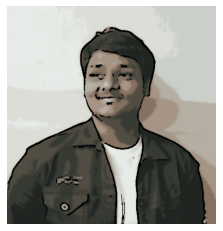

In [7]:
#from main import Main
root = Main()
root.mainloop()